In [5]:
# ! pip install easyocr

In [1]:
import easyocr
import numpy as np

In [2]:
X = np.load('c:/3rd_project/data/images/movie/X_total_color.npy')
y = np.load('c:/3rd_project/data/images/movie/y_total_color.npy')

In [3]:
X[0]

array([[[245, 255, 255],
        [242, 252, 254],
        [246, 255, 255],
        ...,
        [250, 250, 252],
        [254, 255, 255],
        [254, 255, 255]],

       [[194, 217, 231],
        [197, 220, 233],
        [194, 216, 229],
        ...,
        [245, 245, 247],
        [240, 241, 243],
        [238, 239, 241]],

       [[193, 217, 227],
        [193, 217, 228],
        [194, 216, 227],
        ...,
        [250, 249, 254],
        [249, 250, 252],
        [241, 242, 244]],

       ...,

       [[241, 242, 244],
        [241, 242, 244],
        [241, 242, 244],
        ...,
        [239, 240, 242],
        [240, 240, 242],
        [240, 240, 242]],

       [[241, 242, 244],
        [241, 242, 244],
        [241, 242, 244],
        ...,
        [239, 240, 242],
        [240, 240, 242],
        [240, 240, 242]],

       [[241, 242, 244],
        [241, 242, 244],
        [241, 242, 244],
        ...,
        [239, 240, 242],
        [240, 240, 242],
        [240, 240, 242]]

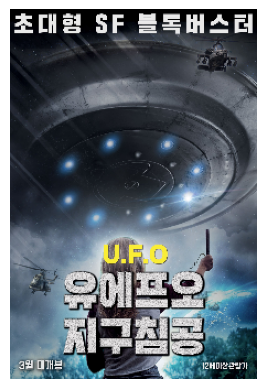

In [150]:
import cv2
from matplotlib import pyplot as plt

num = 4560
img = X[num]

# 이미지 표시
plt.imshow(img)
plt.axis("off")
plt.show()

reader = easyocr.Reader(['ko','en'])
result = reader.readtext(X[num])

In [31]:
result

[([[5, 7], [217, 7], [217, 27], [5, 27]],
  '서계 면망음 초래학 조득금 재난이 시작되다',
  0.18367478269846083),
 ([[2, 240], [224, 240], [224, 296], [2, 296]], '둘스데이mM', 0.20345496797398152),
 ([[33, 309], [191, 309], [191, 329], [33, 329]],
  '5월 8일 인류의 마지막 그늘이 온다',
  0.5085836733659936)]

In [239]:
len(X)

7005

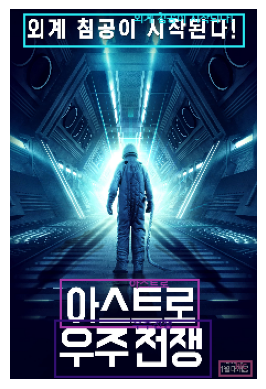

[([[12, 4], [212, 4], [212, 34], [12, 34]], '외계 침공이 시작되다!', 0.5211718433291782), ([[45, 245], [171, 245], [171, 289], [45, 289]], '아스트로', 0.9551488757133484), ([[40, 282], [182, 282], [182, 334], [40, 334]], '우주전쟁', 0.6908219456672668), ([[189, 319], [219, 319], [219, 333], [189, 333]], 'Iiic', 0.031334131956100464)]


In [316]:
import easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

# num = 3530
num = 4444
img = X[num]

# img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

reader = easyocr.Reader(['ko', 'en'], gpu = True)
result = reader.readtext(img)

# img = cv2.resize(img_cv2, (320, 448))
img = Image.fromarray(img)
font = ImageFont.truetype('C:/Users/tjoeun/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf', 10)
draw = ImageDraw.Draw(img)
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")
for i in result :
    x = i[0][0][0] 
    y = i[0][0][1] 
    w = i[0][1][0] - i[0][0][0] 
    h = i[0][2][1] - i[0][1][1]

    color_idx = random.randint(0,255) 
    color = [int(c) for c in COLORS[color_idx]]

    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)

# plt.figure(figsize=(10,20))
plt.imshow(img)
plt.axis("off")
plt.show()
print(result)

In [314]:
import cv2
import easyocr
import matplotlib.pyplot as plt


def image_to_text2(img):
    # 추출된 텍스트 영역을 이용하여 각각의 텍스트를 잘라내고 EasyOCR을 다시 적용
    reader = easyocr.Reader(['ko', 'en'], gpu=True)
    result = reader.readtext(img)
    
    origin_results = []
    roi_results = []
    roi_gray_results =[]
    roi_2_results =[]
    roi_equal_results =[]
    roi_dil_results =[]
    roi_ero_results =[]
    roi_canny_results =[]

    for (box, text, confidence) in result:
        try:
            origin_results.append(text)
        except:
            pass

        # 각 텍스트 박스의 좌표 추출
        (startX, startY) = box[0]
        (endX, endY) = box[2]
        
        # 좌표를 정수로 변환
        startX, startY, endX, endY = int(startX), int(startY), int(endX), int(endY)

        # print(startX, startY, endX, endY)
        # 좌표가 음수이거나 이미지 범위를 벗어나는 경우 무시
        if startX < 0 or startY < 0 or endX >= img.shape[1] or endY >= img.shape[0]:
            continue

        # 텍스트 영역 추출
        roi = img[startY:endY, startX:endX]

        ############################################# 이미지 전처리 ###################################################

        # 이미지를 그레이스케일로 변환
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # 적응형 이진화 수행
        roi_adaptive_thresh = cv2.adaptiveThreshold(roi_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

        # 히스토그램 평탄화 수행
        roi_equalized = cv2.equalizeHist(roi_gray)

        # 팽창
        kernel = np.ones((3, 3), np.uint8)
        roi_dilation = cv2.dilate(roi, kernel, iterations=1)

        # 침식
        kernel = np.ones((3, 3), np.uint8)
        roi_erosion = cv2.erode(roi, kernel, iterations=1)

        # 캐니
        roi_canny = cv2.Canny(roi, 475, 500, apertureSize=3, L2gradient=True)

        ############################################# 텍스트 인식 ###################################################

        # 잘라낸 텍스트 영역에 EasyOCR을 적용
        roi_result = reader.readtext(roi)
        roi_gray_result = reader.readtext(roi_gray)
        roi_2_result = reader.readtext(roi_adaptive_thresh)
        roi_equal_result = reader.readtext(roi_equalized)
        roi_dil_result = reader.readtext(roi_dilation)
        roi_ero_result = reader.readtext(roi_erosion)
        roi_canny_result = reader.readtext(roi_canny)

        ############################################# 결과 출력 ###################################################

        # print("부분")
        # plt.imshow(roi)
        try:
            # print(f'Text: {roi_result[0][1]}, Confidence: {roi_result[0][2]}')
            roi_results.append(roi_result[0][1])
        except:
            # print("Not Detect")
            roi_results.append('None')
        # plt.axis('off')
        # plt.show()

        # print("그레이 스케일")
        # plt.imshow(roi_gray, cmap="gray")
        try:
            # print(f'Text: {roi_gray_result[0][1]}, Confidence: {roi_gray_result[0][2]}')
            roi_gray_results.append(roi_gray_result[0][1])
        except:
            # print("Not Detect")
            roi_gray_results.append('None')
        # plt.axis('off')
        # plt.show()

        # print("적응형 이진화")
        # plt.imshow(roi_adaptive_thresh, cmap="gray")
        try:
            # print(f'Text: {roi_2_result[0][1]}, Confidence: {roi_2_result[0][2]}')
            roi_2_results.append(roi_2_result[0][1])
        except:
            # print("Not Detect")
            roi_2_results.append('None')
        # plt.axis('off')
        # plt.show()

        # print("히스토그램 평탄화")
        # plt.imshow(roi_equalized)
        try:
            # print(f'Text: {roi_equal_result[0][1]}, Confidence: {roi_equal_result[0][2]}')
            roi_equal_results.append(roi_equal_result[0][1])
        except:
            # print("Not Detect")
            roi_equal_results.append('None')
        # plt.axis('off')
        # plt.show()

        # print("팽창")
        # plt.imshow(roi_dilation)
        try:
            # print(f'Text: {roi_dil_result[0][1]}, Confidence: {roi_dil_result[0][2]}')
            roi_dil_results.append(roi_dil_result[0][1])
        except:
            # print("Not Detect")
            roi_dil_results.append('None')
        # plt.axis('off')
        # plt.show()

        # print("침식")
        # plt.imshow(roi_erosion)
        try:
            # print(f'Text: {roi_ero_result[0][1]}, Confidence: {roi_ero_result[0][2]}')
            roi_ero_results.append(roi_ero_result[0][1])
        except:
            # print("Not Detect")
            roi_ero_results.append('None')
        # plt.axis('off')
        # plt.show()

        # print("캐니")
        # plt.imshow(roi_canny)
        try:
            # print(f'Text: {roi_canny_result[0][1]}, Confidence: {roi_canny_result[0][2]}')
            roi_canny_results.append(roi_canny_result[0][1])
        except:
            # print("Not Detect")
            roi_canny_results.append('None')
        # plt.axis('off')
        # plt.show()
    return origin_results, roi_results, roi_gray_results, roi_2_results, roi_equal_results, roi_dil_results, roi_ero_results, roi_canny_results

In [318]:
i2t = image_to_text2(X[10])
i2t

(['2011년 첫판티지액선대작', '시즌오트다위지', '마녀로승단', '1런 대꺼임메 및선 5민의 기1단미온대'],
 ['시즌오트다위치', '마녀로승단', '1 대꺼임메 및선5민미기시단미본대'],
 ['시즌오트다위치', '마녀로승단', '1 대꺼임메 및선5민미기시단미본대'],
 ['스즌으부다위지', '마녀로속단', '오대머만메 및점 EP미애스도미롬대'],
 ['시즌용부드위치', '마녀', '대량로에 및르 조라l기소무의르대'],
 ['시즌월킬드위지', '미도 터', 'None'],
 ['7', 'None', 'None'],
 ['름론@텔l월터', '떼때계돌-손텔', 'Dmmz고a멘 a 소관꽤] 스사달폐 h다)'])

In [321]:
from konlpy.tag import Kkma

kkma = Kkma()

def get_nouns(text):
    nouns = kkma.nouns(text)
    return nouns

noun_data = [[get_nouns(text) for text in sublist] for sublist in i2t]

# 추출된 명사 출력
for sublist in noun_data:
    print(sublist)

[['2011', '2011년', '년', '첫판', '액', '액선대작', '선', '대작'], ['시즌', '시즌오트', '오트', '위지'], ['마녀', '승단'], ['1', '1런', '런', '대', '임', '임메', '메', '선', '5', '5민의', '민의', '기', '기1단미온', '단', '미온']]
[['시즌', '시즌오트', '오트', '위치'], ['마녀', '승단'], ['1', '대', '대꺼임메', '꺼', '임', '메', '선', '선5', '5', '미기', '시단', '시단미본대', '미', '본대']]
[['시즌', '시즌오트', '오트', '위치'], ['마녀', '승단'], ['1', '대', '대꺼임메', '꺼', '임', '메', '선', '선5', '5', '미기', '시단', '시단미본대', '미', '본대']]
[['스즌으', '위지'], ['마녀', '속단'], ['오대', '머', '메', '미', '미애스도미', '애', '스도', '롬']]
[['시즌', '부', '위'], ['마녀'], ['대량', '르', '조라', '기소', '기소무', '무']]
[['시즌', '시즌월', '월', '위지'], ['미도', '터'], []]
[['7'], [], []]
[['름', '름론', '론', '텔', '월'], ['떼', '떼때', '때', '돌', '손', '손텔', '텔'], ['소관', '폐']]
